![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [99]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [100]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [101]:
penguins_df = pd.get_dummies(penguins_df, dtype='int')


print(penguins_df.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')


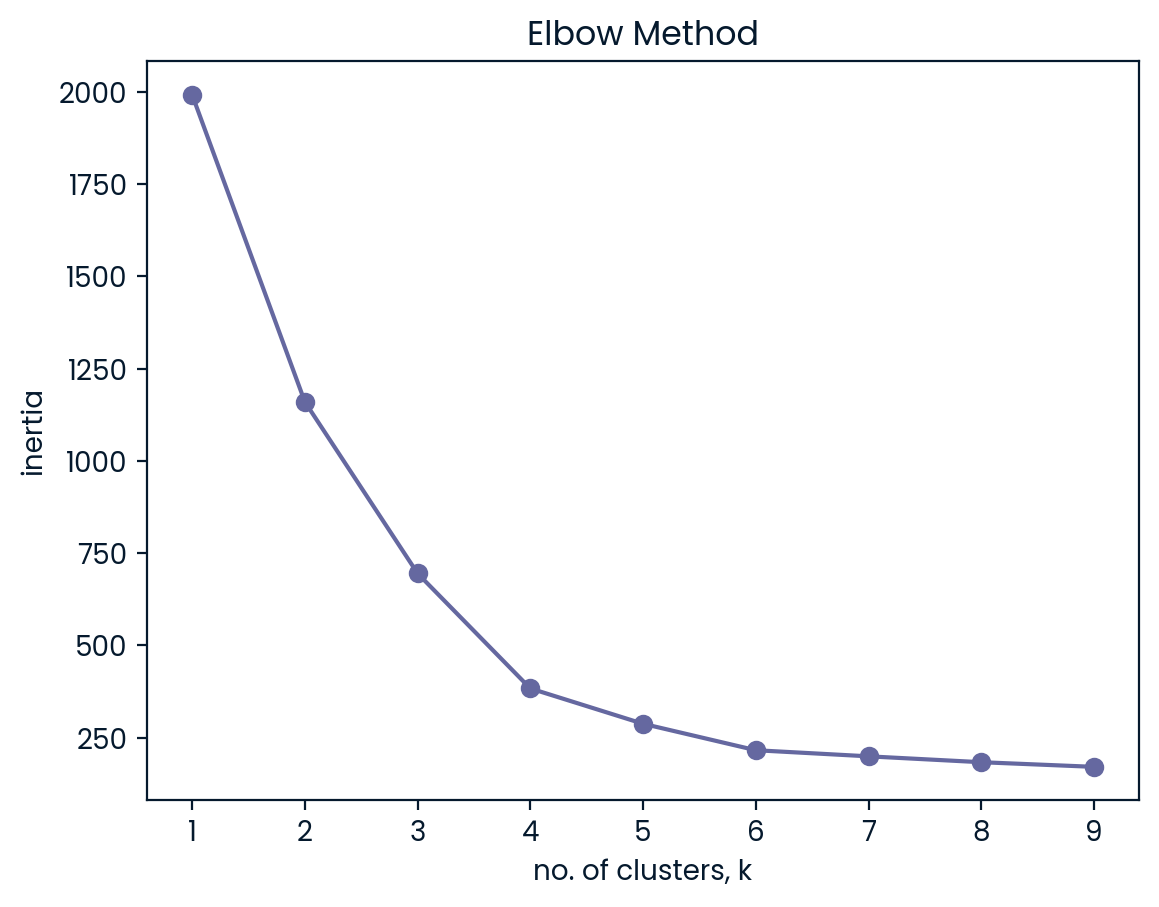

In [102]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)

inertia = []

for k in range (1,10):
    kmeans = KMeans(n_clusters=k, random_state =42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker ='o')
plt.xlabel('no. of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

no_of_clusters = 4

In [103]:
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(penguins_preprocessed)
labels = model.predict(penguins_preprocessed)

print(labels)

[0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 3 2 3 2 2 3 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2 2 3 2 2 3 3 2 3 2 3 2 3 2 3 2 3 2 2 3 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 2 3 2 3 2 2 3 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2]


In [104]:
penguins_preprocessed['label'] = model.labels_
print(model.labels_)

[0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 3 2 3 2 2 3 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2 2 3 2 2 3 3 2 3 2 3 2 3 2 3 2 3 2 2 3 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 2 3 2 3 2 2 3 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 3 2 3 2 2 3 3 2 3 2]


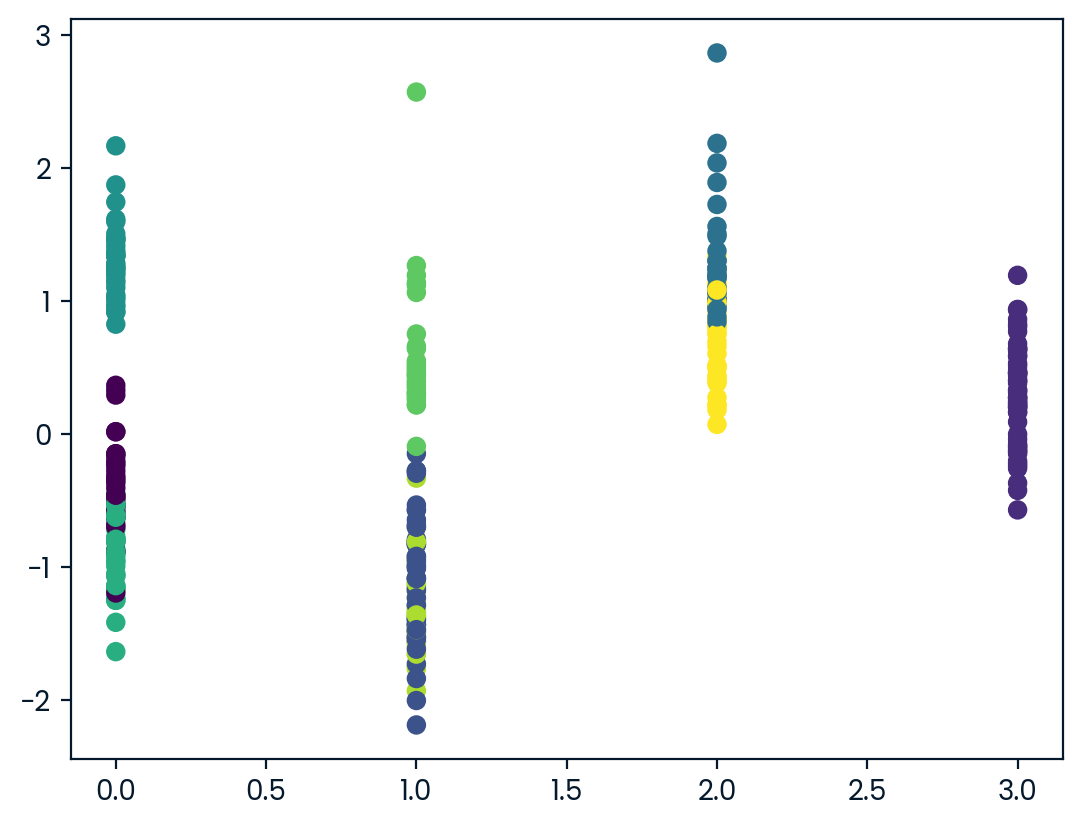

In [105]:

plt.scatter(penguins_preprocessed['label'], penguins_preprocessed['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.show()

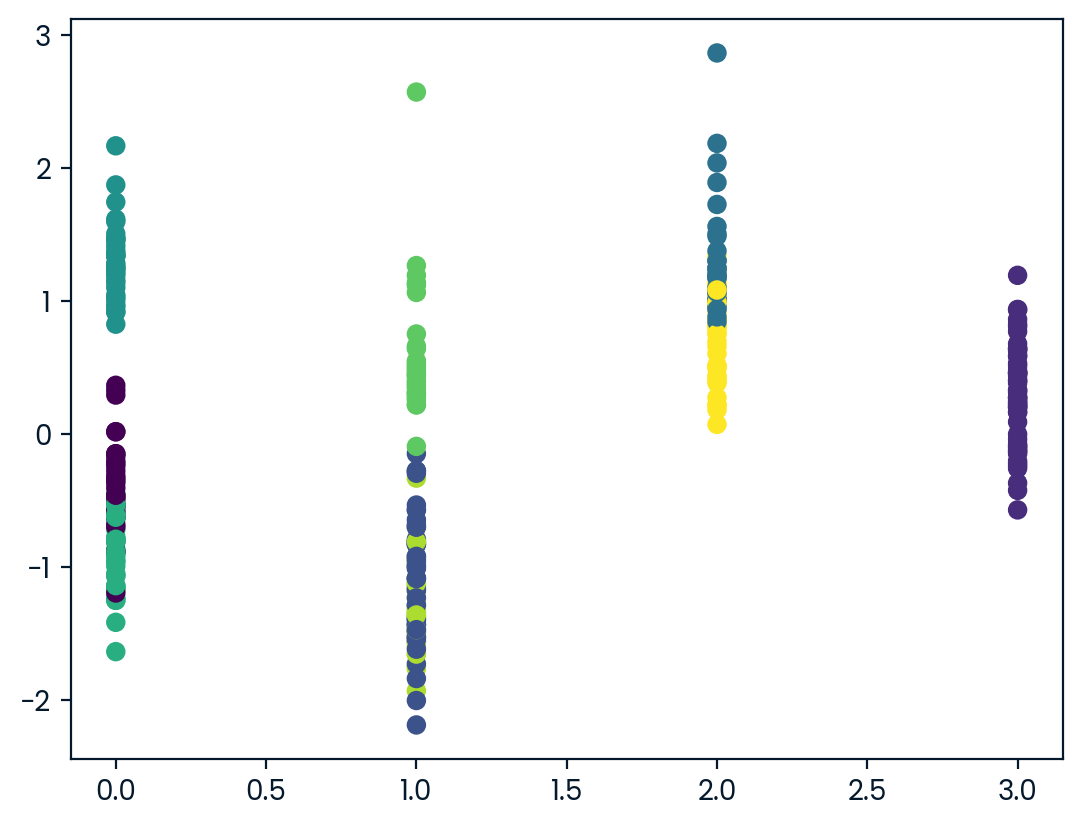

In [106]:

plt.scatter(penguins_preprocessed['label'], penguins_preprocessed['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.show()

In [107]:
penguins_df['label'] = model.labels_

penguins_numeric = penguins_df.drop(columns=['sex_FEMALE', 'sex_MALE'])

numeric_columns = list(penguins_numeric.columns)

stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()

print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  label
label                                                                          
0             43.878302        19.111321         194.764151  4006.603774    0.0
1             40.217757        17.611215         189.046729  3419.158879    1.0
2             49.473770        15.718033         221.540984  5484.836066    2.0
3             45.563793        14.237931         212.706897  4679.741379    3.0
